In [18]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import files

In [5]:
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!kaggle competitions download -c nfl-big-data-bowl-2024

 99% 276M/279M [00:03<00:00, 102MB/s] 
100% 279M/279M [00:03<00:00, 92.3MB/s]


In [8]:
!unzip nfl-big-data-bowl-2024.zip

Archive:  nfl-big-data-bowl-2024.zip
  inflating: games.csv               
  inflating: players.csv             
  inflating: plays.csv               
  inflating: tackles.csv             
  inflating: tracking_week_1.csv     
  inflating: tracking_week_2.csv     
  inflating: tracking_week_3.csv     
  inflating: tracking_week_4.csv     
  inflating: tracking_week_5.csv     
  inflating: tracking_week_6.csv     
  inflating: tracking_week_7.csv     
  inflating: tracking_week_8.csv     
  inflating: tracking_week_9.csv     


In [9]:
plays=pd.read_csv('plays.csv')
games=pd.read_csv('games.csv')
players=pd.read_csv('players.csv')

In [14]:
games['homeWin']=np.where(games['homeFinalScore']>games['visitorFinalScore'], 1, 0)
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,homeWin
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,0
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27,0
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26,0
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10,1
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23,0
...,...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20,0
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31,0
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13,1
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17,1


In [16]:
# PyMC model specification
y = games['homeWin'].values.reshape(-1, 1) # target
X = games[["homeFinalScore"]].values # predictors

n, p = y.shape[0], X.shape[1]

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Bernoulli('y', logit_p=pm.math.sigmoid(pm.math.dot(X, betas)), observed= y)

with MLR:
    idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


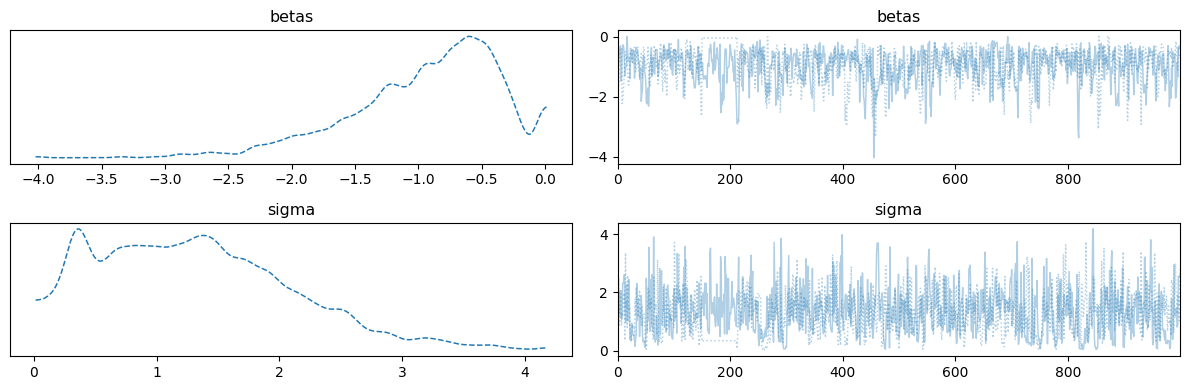

In [17]:
az.plot_trace(idata, combined=True);
plt.tight_layout()

Part 2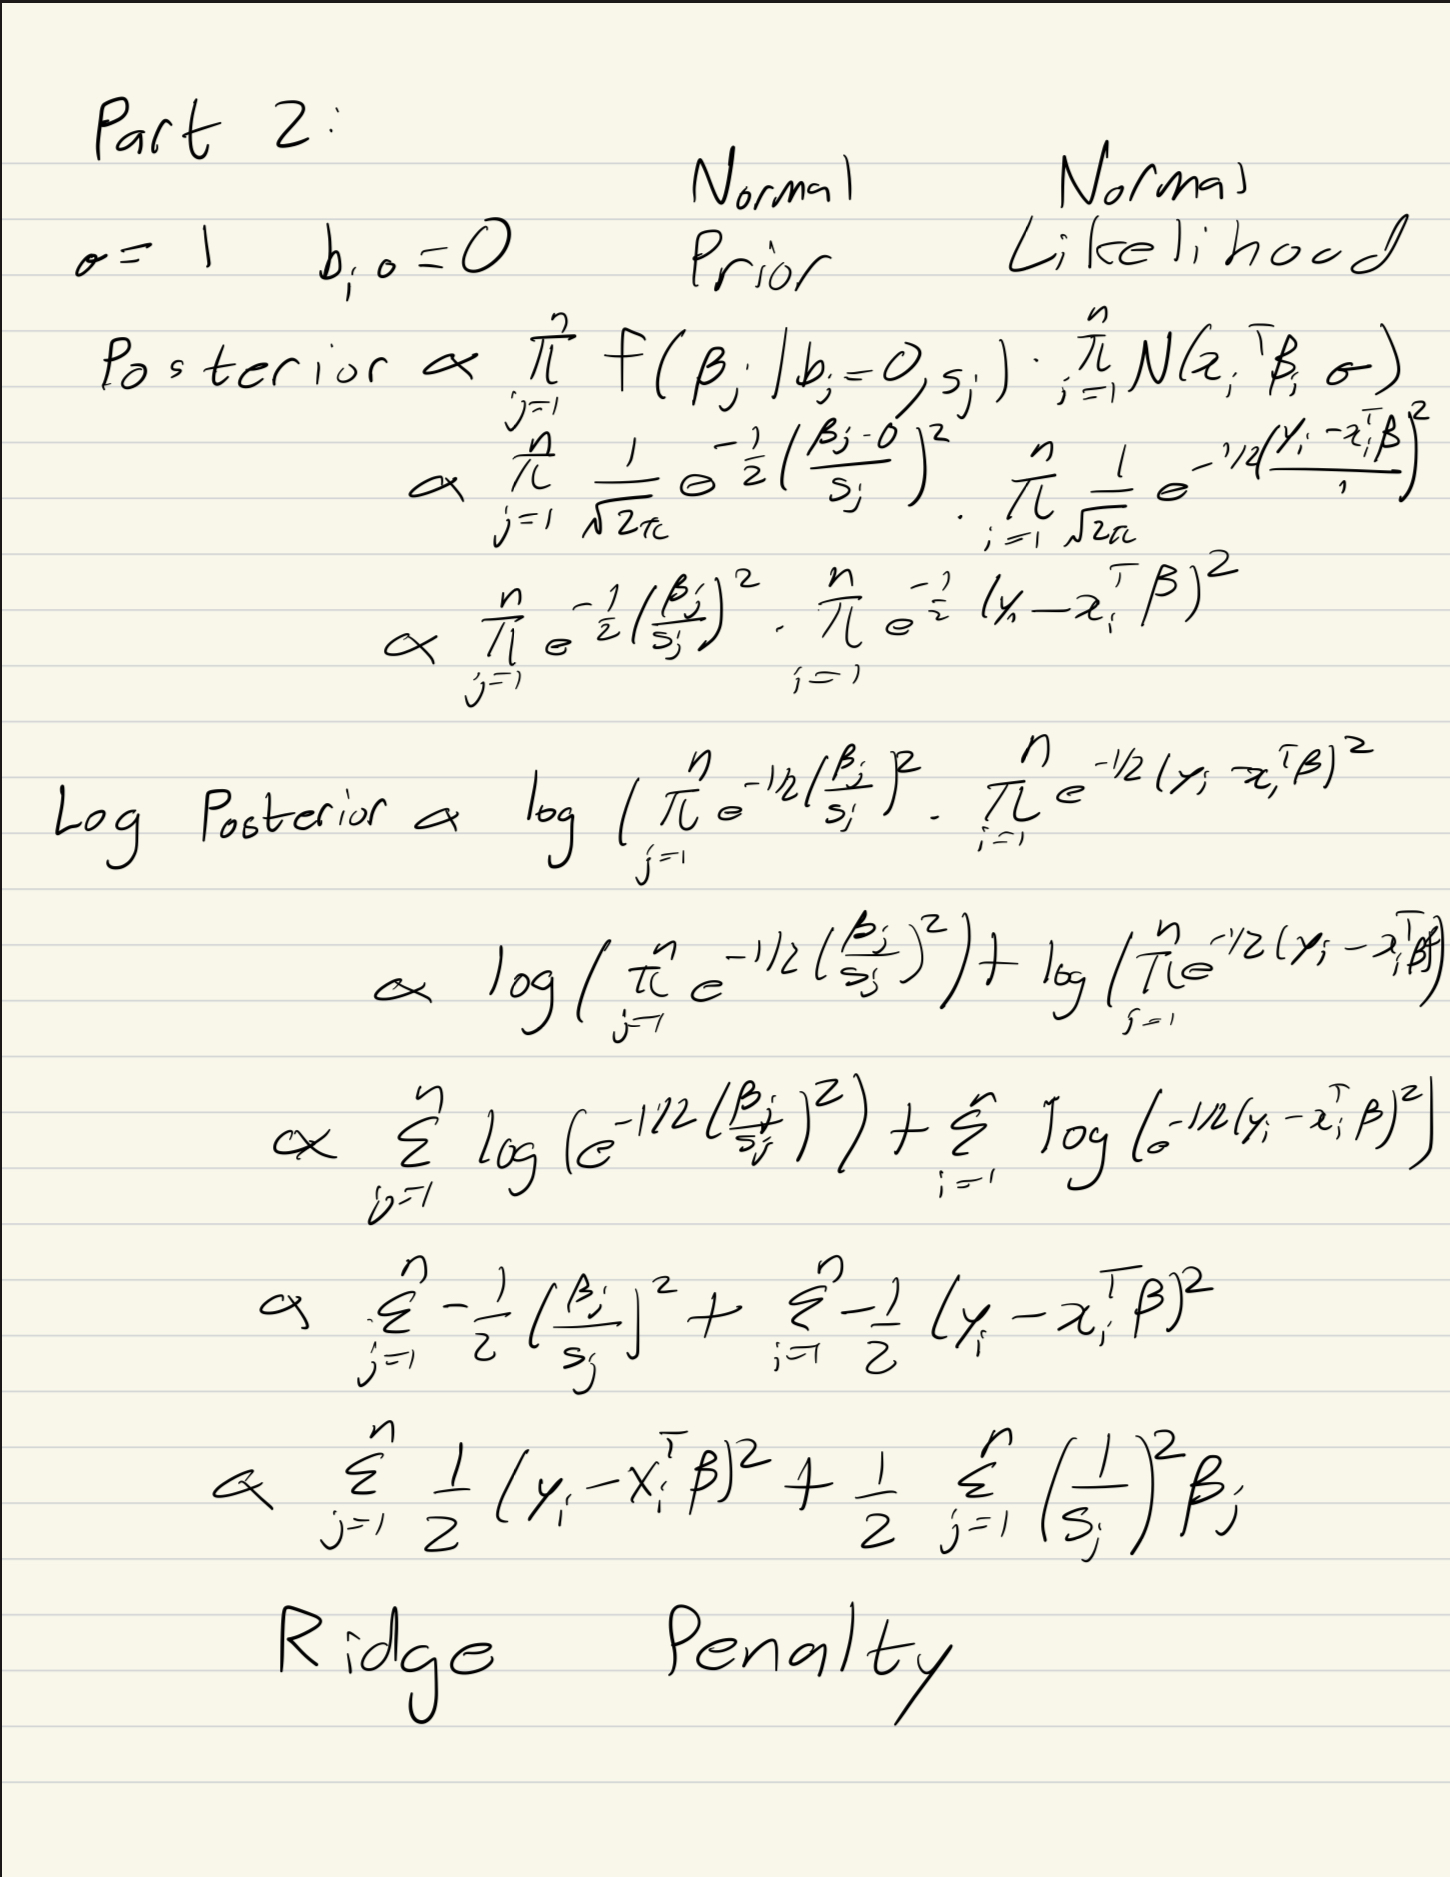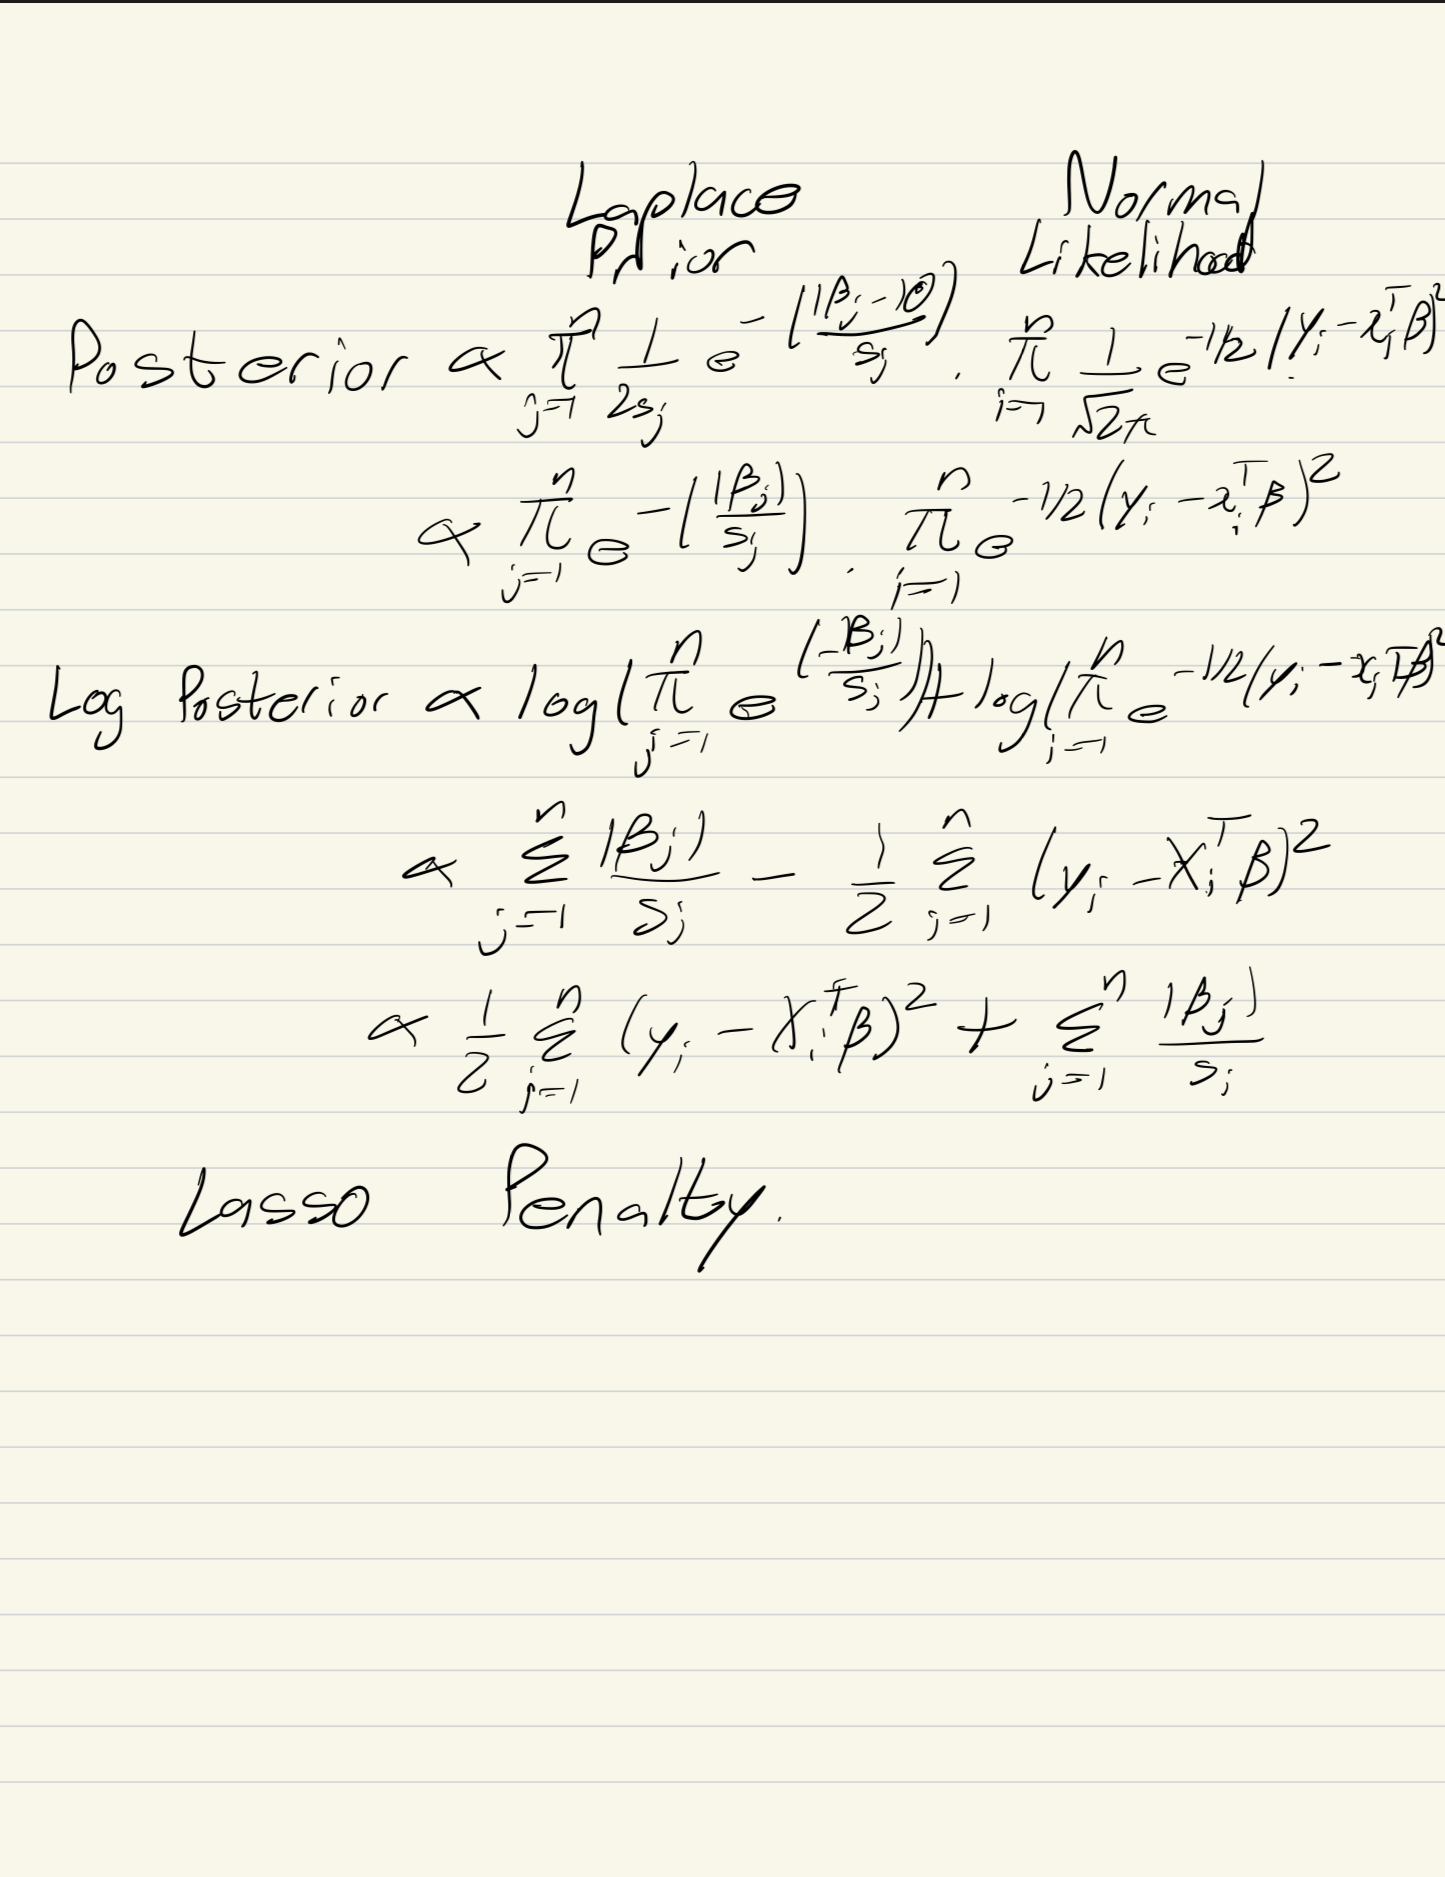